<a href="https://colab.research.google.com/github/Harsha-0310/Loan-Pred/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv('/content/dataset.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,479618,0.0,0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,375806,123656.0,10496,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,246000,0.0,5412,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,211806,193356.0,9840,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,492000,0.0,11562,360.0,1.0,Urban,Y


# **Data Preprocessing**

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,479618,0.0,0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,375806,123656.0,10496,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,246000,0.0,5412,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,211806,193356.0,9840,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,492000,0.0,11562,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,237800,0.0,5822,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,336692,0.0,3280,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,661904,19680.0,20746,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,621806,0.0,15334,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,375806,0.0,10906,360.0,0.0,Semiurban,N


In [5]:
df.shape

(614, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    int64  
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 62.5+ KB


In [7]:
df.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,6.140000e+02,6.140000e+02,614.00000,600.00000,564.000000
mean,4.430837e+05,1.329422e+05,11575.62215,342.00000,0.842199
std,5.009414e+05,2.399524e+05,7243.93169,65.12041,0.364878
min,1.230000e+04,0.000000e+00,0.00000,12.00000,0.000000
25%,2.359550e+05,0.000000e+00,8036.00000,360.00000,1.000000
50%,3.126250e+05,9.745700e+04,10250.00000,360.00000,1.000000
75%,4.751900e+05,1.883745e+05,13509.50000,360.00000,1.000000
max,6.642000e+06,3.416694e+06,57400.00000,480.00000,1.000000


In [11]:
df[['ApplicantIncome','LoanAmount']]

,ApplicantIncome,LoanAmount
0,479618,0
1,375806,10496
2,246000,5412
3,211806,9840
4,492000,11562
...,...,...
609,237800,5822
610,336692,3280
611,661904,20746
612,621806,15334


## Handling Numerical Missing Data

In [12]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [13]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,479618,0.0,0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,375806,123656.0,10496,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,246000,0.0,5412,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,211806,193356.0,9840,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,492000,0.0,11562,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,237800,0.0,5822,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,336692,0.0,3280,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,661904,19680.0,20746,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,621806,0.0,15334,360.0,1.0,Urban,Y


In [15]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

# Handle Categorical Missing Data

In [16]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [17]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,479618,0.0,0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,375806,123656.0,10496,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,246000,0.0,5412,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,211806,193356.0,9840,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,492000,0.0,11562,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,237800,0.0,5822,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,336692,0.0,3280,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,661904,19680.0,20746,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,621806,0.0,15334,360.0,1.0,Urban,Y


In [18]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# **Exploratory Data Analysis(EDA)**

# Categorical Data

<Axes: xlabel='Gender', ylabel='count'>

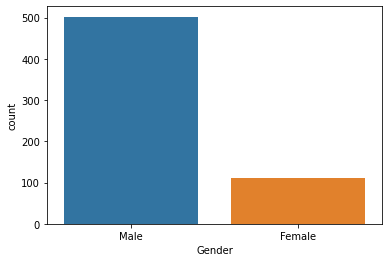

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Gender',data=df)



<Axes: xlabel='Dependents', ylabel='count'>

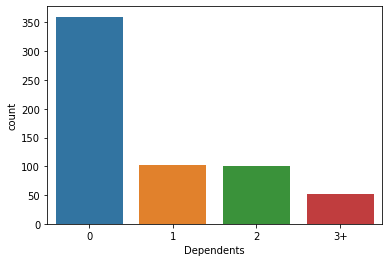

In [20]:
sns.countplot(x='Dependents',data=df)

<Axes: xlabel='Married', ylabel='count'>

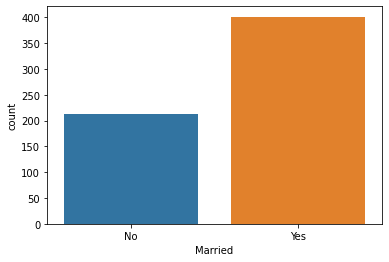

In [21]:

sns.countplot(x='Married',data=df)

In [22]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Numerical Data

<ipython-input-23-b320328e805e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.CoapplicantIncome)


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

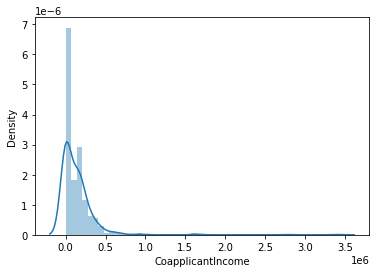

In [23]:
sns.distplot(df.CoapplicantIncome)

<ipython-input-24-a477b5a8ff76>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.LoanAmount)


<Axes: xlabel='LoanAmount', ylabel='Density'>

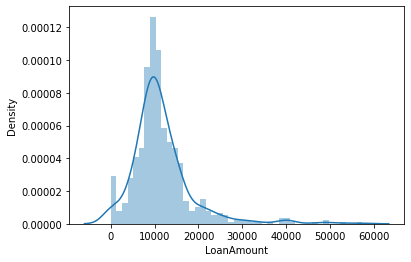

In [24]:
sns.distplot(df.LoanAmount)


<ipython-input-25-b06917134064>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Credit_History)


<Axes: xlabel='Credit_History', ylabel='Density'>

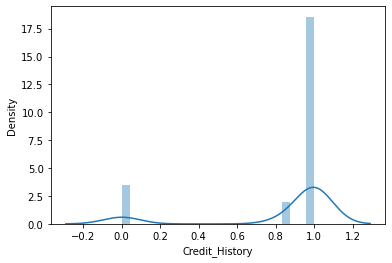

In [25]:
sns.distplot(df.Credit_History)

# Lable Encoding

In [26]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,479618,0.0,0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,375806,123656.0,10496,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,246000,0.0,5412,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,211806,193356.0,9840,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,492000,0.0,11562,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,237800,0.0,5822,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,336692,0.0,3280,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,661904,19680.0,20746,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,621806,0.0,15334,360.0,1.0,Urban,Y


In [27]:
df.Gender=df.Gender.map({'Male':1,'Female':0})
df.Gender.value_counts()


1    502
0    112
Name: Gender, dtype: int64

In [28]:
df.Self_Employed=df.Self_Employed.map({'Yes':1,'No':0})
df.Self_Employed.value_counts()


0    532
1     82
Name: Self_Employed, dtype: int64

In [29]:
df.Married=df.Married.map({'Yes':1,'No':0})
df.Married.value_counts()


1    401
0    213
Name: Married, dtype: int64

In [30]:
df.Education=df.Education.map({'Graduate':1,'Not Graduate':0})
df.Education.value_counts()


1    480
0    134
Name: Education, dtype: int64

In [31]:
df.Dependents=df.Dependents	.map({'0':0,'1':1,'2':2,'3+':3})
df.Dependents.value_counts()


0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [32]:
df.Property_Area=df.Property_Area.map({'Urban':0,'Rural':1,'Semiurban':2})
df.Property_Area.value_counts()


2    233
0    202
1    179
Name: Property_Area, dtype: int64

In [33]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,479618,0.0,0,360.0,1.0,0,Y
1,LP001003,1,1,1,1,0,375806,123656.0,10496,360.0,1.0,1,N
2,LP001005,1,1,0,1,1,246000,0.0,5412,360.0,1.0,0,Y
3,LP001006,1,1,0,0,0,211806,193356.0,9840,360.0,1.0,0,Y
4,LP001008,1,0,0,1,0,492000,0.0,11562,360.0,1.0,0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,237800,0.0,5822,360.0,1.0,1,Y
610,LP002979,1,1,3,1,0,336692,0.0,3280,180.0,1.0,1,Y
611,LP002983,1,1,1,1,0,661904,19680.0,20746,360.0,1.0,0,Y
612,LP002984,1,1,2,1,0,621806,0.0,15334,360.0,1.0,0,Y


In [34]:
x = df.drop(columns=["Loan_ID",'Loan_Status'], axis=1)
y = df['Loan_Status']

In [35]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,479618,0.0,0,360.0,1.0,0
1,1,1,1,1,0,375806,123656.0,10496,360.0,1.0,1
2,1,1,0,1,1,246000,0.0,5412,360.0,1.0,0
3,1,1,0,0,0,211806,193356.0,9840,360.0,1.0,0
4,1,0,0,1,0,492000,0.0,11562,360.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,237800,0.0,5822,360.0,1.0,1
610,1,1,3,1,0,336692,0.0,3280,180.0,1.0,1
611,1,1,1,1,0,661904,19680.0,20746,360.0,1.0,0
612,1,1,2,1,0,621806,0.0,15334,360.0,1.0,0


In [36]:
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [38]:
x_train.shape
x_test.shape
y_train.shape
y_test.shape

(154,)

In [39]:
x_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
46,1,1,1,1,0,463218,0.0,3608,360.0,1.0,0
272,1,0,0,1,0,232306,152274.0,10332,360.0,1.0,1
474,1,0,2,1,0,453624,381136.0,13284,360.0,1.0,1
382,0,0,0,1,0,492000,0.0,12792,360.0,1.0,0
283,0,0,0,1,0,148502,136612.0,4428,360.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
277,1,1,0,1,0,254446,106600.0,6560,360.0,1.0,0
9,1,1,1,1,0,1052962,899376.0,28618,360.0,1.0,2
359,1,1,3,1,0,423694,259694.0,16400,360.0,1.0,2
192,1,1,0,0,0,494706,0.0,13120,360.0,1.0,0


In [40]:
y_train

46     Y
272    Y
474    Y
382    Y
283    Y
      ..
277    Y
9      N
359    Y
192    N
559    Y
Name: Loan_Status, Length: 460, dtype: object

In [41]:
y_test

454    Y
52     N
536    Y
469    N
55     Y
      ..
399    N
89     Y
271    Y
563    Y
162    N
Name: Loan_Status, Length: 154, dtype: object

In [42]:
x_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
454,1,0,0,1,1,580970,0.0,6888,360.0,1.0,2
52,0,0,0,1,0,346860,0.0,9184,360.0,1.0,2
536,1,1,0,1,0,502906,320292.0,26568,360.0,1.0,0
469,1,1,0,1,0,355306,200982.0,9020,360.0,1.0,0
55,1,1,2,1,0,222056,95694.0,7954,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
399,0,0,0,1,0,123000,147600.0,8446,360.0,0.0,2
89,1,1,0,1,0,466990,341694.0,14350,360.0,1.0,2
271,1,1,0,1,0,913972,0.0,11152,360.0,1.0,0
563,1,0,0,0,1,475600,0.0,10824,360.0,1.0,2


# Model Training
**RandomforestClassifier**

In [43]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
x_train=sc_X.fit_transform(x_train)
x_test=sc_X.transform(x_test)

In [44]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=5,criterion="entropy",random_state=50)
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=5, random_state=50)

In [45]:
print("Accuracy of RFClassifier:", model.score(x_test, y_test)*100)

Accuracy of RFClassifier: 81.16883116883116


In [46]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(criterion="entropy",random_state=0)
model2.fit(x_train, y_train)



DecisionTreeClassifier(criterion='entropy', random_state=0)

In [47]:
print("Accuracy of Decision Tree:", model2.score(x_test, y_test)*100)

Accuracy of Decision Tree: 78.57142857142857


In [48]:
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression(random_state=0)
model3.fit(x_train, y_train)


LogisticRegression(random_state=0)

In [49]:
print("Accuracy of LR:", model3.score(x_test, y_test)*100)

Accuracy of LR: 83.76623376623377


In [50]:
from sklearn.svm import SVC
model4 = SVC(kernel='linear', C = 1.0)
model4.fit(x_train, y_train)


SVC(kernel='linear')

In [51]:
print("Accuracy of SVC:", model4.score(x_test, y_test)*100)

Accuracy of SVC: 83.11688311688312


In [52]:
#from sklearn.preprocessing import StandardScaler
#sc_X=StandardScaler()
#x_train=sc_X.fit_transform(x_train)
#x_test=sc_X.transform(x_test)

In [53]:
from sklearn.neighbors import (KNeighborsClassifier)
model5=KNeighborsClassifier(n_neighbors=10, p=2,metric='euclidean')
model5.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [54]:
print("Accuracy of KNN:", model5.score(x_test, y_test)*100)

Accuracy of KNN: 81.81818181818183


In [55]:
print("Accuracy of RFClassifier:", model.score(x_test, y_test)*100)
print("Accuracy of Decision Tree:", model2.score(x_test, y_test)*100)
print("Accuracy of LR:", model3.score(x_test, y_test)*100)
print("Accuracy of SVC:", model4.score(x_test, y_test)*100)
print("Accuracy of KNN:", model5.score(x_test, y_test)*100)

Accuracy of RFClassifier: 81.16883116883116
Accuracy of Decision Tree: 78.57142857142857
Accuracy of LR: 83.76623376623377
Accuracy of SVC: 83.11688311688312
Accuracy of KNN: 81.81818181818183


In [56]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred = model5.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 21,  22],
       [  6, 105]])

In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           N       0.78      0.49      0.60        43
           Y       0.83      0.95      0.88       111

    accuracy                           0.82       154
   macro avg       0.80      0.72      0.74       154
weighted avg       0.81      0.82      0.80       154



In [58]:
# searilazation
import joblib
joblib.dump(model5,'Loan_pred')

['Loan_pred']

In [59]:
# desarilazation
import joblib
text_model=joblib.load('Loan_pred')

In [60]:
import pickle
file="loan_est.pkl"
with open(file,'wb') as f:
  pickle.dump(model,f)

In [61]:
with open(file,'rb') as f:
  k=pickle.load(f)

In [62]:
k=text_model.predict([[1,	1	,0	,1	,1	,246000,	0.0	,5412	,360.0,	1.0	,0	]])

print(k)

['Y']


In [63]:
k=text_model.predict([[1,	1	,1,	1	,0,	375806,	123656.0	,10496	,360.0	,1.0	,1		]])

print(k)

['Y']


In [64]:
k=text_model.predict([[0,	0,	0	,1	,1	,2323232,	432422,	133.000000,	360.0,	0.0	,2		]])

print(k)

['Y']


In [65]:
import joblib
